In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
deaths = pd.read_csv('/mnt/c/Users/PC/Desktop/KSCHOOL_MASTER_DS/Downloadss/deaths.csv', 
                    header = 0)

In [3]:
deaths.head(10)

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,0-4,1
1,2017,1,Ciutat Vella,2,el Barri Gòtic,0-4,1
2,2017,1,Ciutat Vella,3,la Barceloneta,0-4,0
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",0-4,0
4,2017,2,Eixample,5,el Fort Pienc,0-4,0
5,2017,2,Eixample,6,la Sagrada Família,0-4,1
6,2017,2,Eixample,7,la Dreta de l'Eixample,0-4,0
7,2017,2,Eixample,8,l'Antiga Esquerra de l'Eixample,0-4,0
8,2017,2,Eixample,9,la Nova Esquerra de l'Eixample,0-4,0
9,2017,2,Eixample,10,Sant Antoni,0-4,0


In [4]:
#Voy a ver si el numero de muertes es lineal con la edad

df = deaths[['Year','Age', 'Number']].groupby(['Year', 'Age']).sum()


In [5]:
df.reset_index(inplace=True)
df.head(13)


,Year,Age,Number
0,2015,0-4,34
1,2015,10-14,11
2,2015,15-19,13
3,2015,20-24,17
4,2015,25-29,20
5,2015,30-34,40
6,2015,35-39,58
7,2015,40-44,110
8,2015,45-49,179
9,2015,5-9,6


In [6]:

#Mido la longitud del dataframe para un año en concreto
length = df[df['Year'] == 2015].shape[0]

# Aquí creo el vector para usar el reindex
p = [0, 9]
q = range(1,8)
r = range(10, length)

p.extend(q)
p.extend(r)

        
years = [2015, 2016, 2017]

# Hago un for para todos los años y busco cambiar el indice por los que he creado en el vector
# Luego hago un append para ponerlos en un nuevo dataframe

df2 = pd.DataFrame()
for year in years:  
    a = df[df['Year'] == year]
    a.reset_index(inplace=True) #Sustituyo los valores del indice de la fila por nuevos indices
    a = a.reindex(p)
    a.drop('index', inplace=True, axis=1)
    
    df2 = df2.append(a)
df2.reset_index(inplace = True)
df2.drop('index', inplace=True, axis=1)



In [7]:
df2.head(20)

,Year,Age,Number
0,2015,0-4,34
1,2015,5-9,6
2,2015,10-14,11
3,2015,15-19,13
4,2015,20-24,17
5,2015,25-29,20
6,2015,30-34,40
7,2015,35-39,58
8,2015,40-44,110
9,2015,50-54,289


In [8]:
df2.replace({'>=100': '99-99'}, inplace=True)
df2.replace({'0-4': '0 - 4'}, inplace=True)
df2.replace({'5-9': '5 - 9'}, inplace=True)

In [9]:
df2['Age'] = ((df2['Age'].str[:2]).astype(int) + (df2['Age'].str[3:5]).astype(int))/2

In [10]:
df2.head(20)

,Year,Age,Number
0,2015,2.0,34
1,2015,7.0,6
2,2015,12.0,11
3,2015,17.0,13
4,2015,22.0,17
5,2015,27.0,20
6,2015,32.0,40
7,2015,37.0,58
8,2015,42.0,110
9,2015,52.0,289


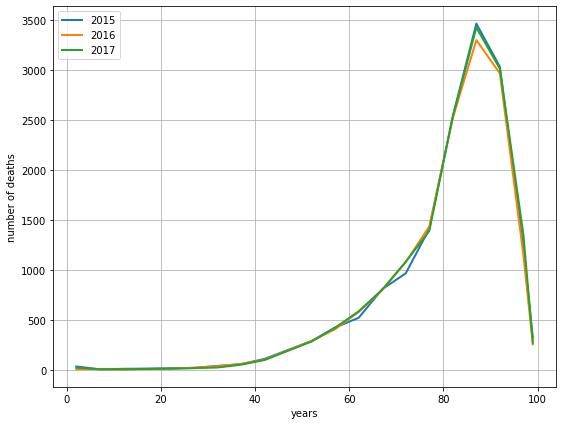

In [11]:
qq = df2[df2['Year'] == 2015].dropna()
rr = df2[df2['Year'] == 2016].dropna()
ss = df2[df2['Year'] == 2017].dropna()
ax, fig = plt.subplots(figsize=(9,7))
plt.plot(qq['Age'], qq['Number'], linewidth=2, label='2015')
plt.plot(rr['Age'], rr['Number'], linewidth=2, label='2016')
plt.plot(ss['Age'], ss['Number'], linewidth=2,label='2017')
plt.legend()
plt.xlabel('years')
plt.ylabel('number of deaths')
plt.grid()

In [12]:
np.argmax((qq['Number']))
qq.loc[16]

/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


Year      2015.0
Age         87.0
Number    3464.0
Name: 16, dtype: float64

In [13]:
p = [1, 9]
q = range(2,8)
r = range(10, length)
p.extend(q)
p.extend(r)
p

[1, 9, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [14]:
# Vamos a aplicar una regresión

x = qq['Age'][:, None]
y = qq['Number'][:, None]


In [15]:
import sklearn
print (sklearn.__version__)

0.22.1


In [17]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(x, y)

print(model.coef_, model.intercept_)

[[23.99946656]] [-485.4222079]


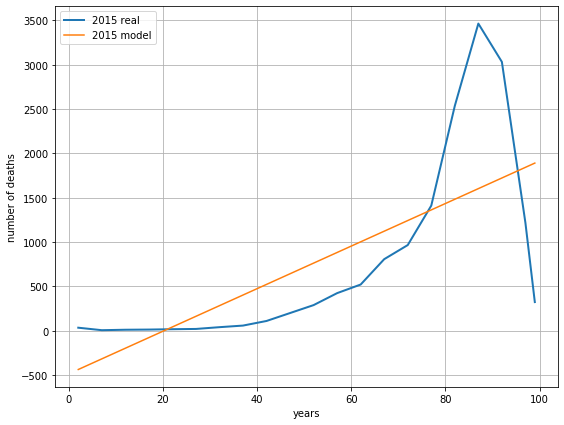

In [18]:
ax, fig = plt.subplots(figsize=(9,7))
plt.plot(qq['Age'], qq['Number'], linewidth=2, label='2015 real')
plt.plot(qq['Age'], model.predict(x), label='2015 model')
plt.legend()
plt.xlabel('years')
plt.ylabel('number of deaths')
plt.grid()


In [21]:
model.predict(np.array([85]).reshape(1,-1))

array([[1554.5324499]])

In [26]:
MSE = sum((y - model.predict(x))**2)
MSE

array([10729978.94461228])

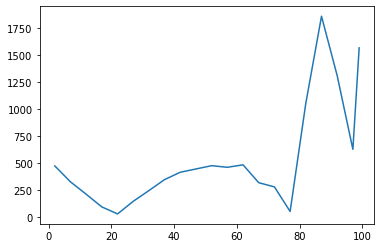

In [27]:
#Grafica de residuos

plt.plot(x, np.abs(y-model.predict(x)))

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [73]:
model2 = Pipeline([('poly', PolynomialFeatures(degree=10)), ('linear', LinearRegression(fit_intercept=False))])
model2.fit(x, y)
c = model2.named_steps['linear'].coef_
c

array([[ 4.43925635e-07,  3.68881169e-04,  1.11616143e-04,
         1.37484724e-03,  1.03321343e-02, -1.12389345e-03,
         4.83418074e-05, -1.05948029e-06,  1.25485702e-08,
        -7.64706333e-11,  1.87953560e-13]])

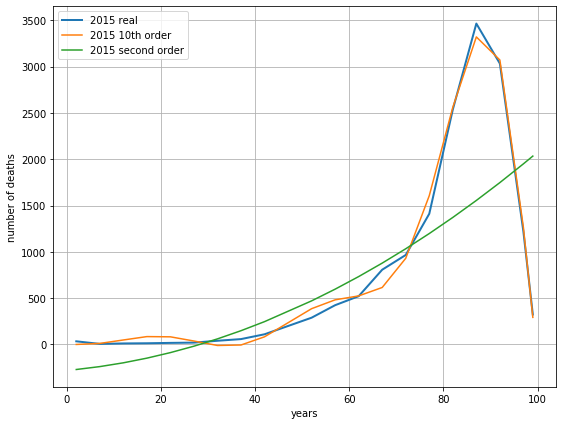

In [74]:
ax, fig = plt.subplots(figsize=(9,7))
plt.plot(qq['Age'], qq['Number'], linewidth=2, label='2015 real')
plt.plot(qq['Age'], model2.predict(x), label='2015 10th order')
plt.plot(qq['Age'], -280.17708834 + x *4.56 + 0.19 * x**2, label='2015 second order')
plt.legend()
plt.xlabel('years')
plt.ylabel('number of deaths')
plt.grid()

In [76]:
model2.predict(np.array([130])[:,None])

array([[1555687.1569401]])